# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

In [1]:
# Cargar todas las librerías

import pandas as pd
import numpy as np
import matplotlib as plot
import seaborn as sns
from scipy import stats

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames

users = pd.read_csv('/datasets/megaline_users.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
calls = pd.read_csv('/datasets/megaline_calls.csv')

print(users.head())
print(plans.head())
print(messages.head())
print(internet.head())
print(calls.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20       

## Preparar los datos

Parece que los datos se cargarón de forma correcta.

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
print(plans.head())
print(plans.info())
print(plans.shape)
print(plans.describe())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   pla

In [4]:
# Imprime una muestra de los datos para las tarifas
print(plans.sample())


   messages_included  mb_per_month_included  minutes_included  \
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
1               70           7             0.01            0.01  ultimate  


Veo que los datos son correctos y no necesitan otra modificación o arrreglo.

## Corregir datos

Considero que los datos no requieren una corrección, tal vez podria pasarlo todo a string ya que es información sobre los planes, pero podria requerir operar con elgún dato en el anáilisis 

## Enriquecer los datos

Considero que los datos estan completos y no me surgen más dudas al respecto

## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

print(users.head())
print(users.info())
print(users.shape)
print(users.describe())
duplicates_rows = users[users.duplicated()]
print(duplicates_rows)

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    

In [ ]:
# Imprime una muestra de datos para usuarios
print(users.sample(10))

     user_id  first_name last_name  age  \
349     1349  Florentina      Diaz   69   
125     1125     Assunta    Carver   39   
450     1450       Errol   Marquez   67   
255     1255     Kennith   Rowland   22   
447     1447       Ramon    Hester   62   
323     1323     Pamelia    Atkins   42   
242     1242    Lashunda     Johns   37   
244     1244    Demarcus     Ellis   75   
51      1051     Rosario     Gibbs   55   
112     1112        Amal   Pacheco   18   

                                       city    reg_date      plan churn_date  
349      Boston-Cambridge-Newton, MA-NH MSA  2018-10-01      surf        NaN  
125   North Port-Sarasota-Bradenton, FL MSA  2018-08-16      surf        NaN  
450                     Bakersfield, CA MSA  2018-06-16  ultimate        NaN  
255                   Oklahoma City, OK MSA  2018-08-01  ultimate        NaN  
447       Orlando-Kissimmee-Sanford, FL MSA  2018-05-01      surf        NaN  
323       Baltimore-Columbia-Towson, MD MSA  2018-12

Cambios a efectuar: 

corregir el tipo de dato de object a datetime de las columnas reg_date y churn_date, tambien podria pasar de int a object la columna user_id, los NaN en churn_date nos informan que no han cancelado la suscripción, y no hay duplicados explicitos 

### Corregir los datos

In [9]:
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'], errors='coerce')

users['user_id'] = users['user_id'].astype('object')
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    object        
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 31.4+ KB
None


### Enriquecer los datos

#considero que los datos (la tabla) estan completos, me surgen dudas como el promedio de edad de los usuarios por suscripción.
Ya sabemos que el promedio de edad del dataset es 45 años 
¿Qué ciudad tiene más suscriptores?

plan
surf        44.952802
ultimate    46.608696
Name: age, dtype: float64


city
New York-Newark-Jersey City, NY-NJ-PA MSA          80
Los Angeles-Long Beach-Anaheim, CA MSA             29
Dallas-Fort Worth-Arlington, TX MSA                21
Chicago-Naperville-Elgin, IL-IN-WI MSA             19
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA    17
                                                   ..
Stockton, CA MSA                                    1
Greensboro-High Point, NC MSA                       1
El Paso, TX MSA                                     1
Cape Coral-Fort Myers, FL MSA                       1
Albany-Schenectady-Troy, NY MSA                     1
Length: 73, dtype: int64




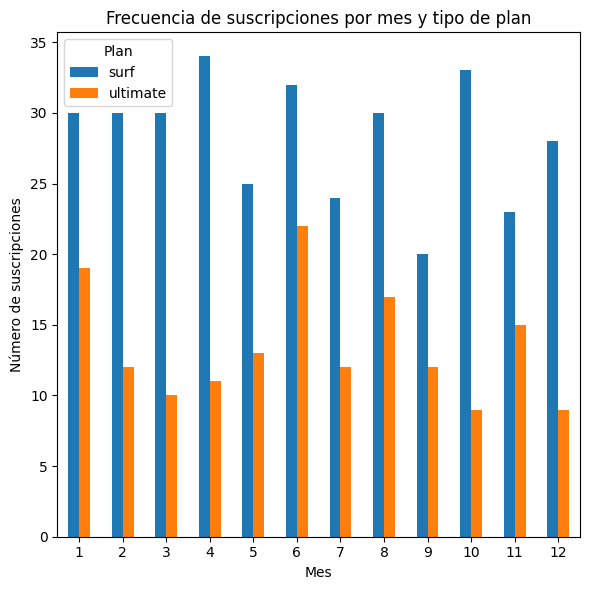

In [ ]:
import matplotlib.pyplot as plt

#grafica de barras de cuando se ha suscrito los usuarios por tipo de plan, siempre sí le voy agregar una columna de mes a la tabla
average_age_by_plan = users.groupby('plan')['age'].mean()
print(average_age_by_plan)

print()
print()

# Contar el número de suscriptores por ciudad
subscribers_by_city = users.groupby('city').size()
subscribers_by_city_sorted = subscribers_by_city.sort_values(ascending=False)
print(subscribers_by_city_sorted)


print()
print()

users['month'] = users['reg_date'].dt.month
# Agrupar por 'month' y 'plan', y contar las suscripciones
monthly_subscriptions = users.groupby(['month', 'plan']).size().unstack()

# Crear la primera gráfica de barras
monthly_subscriptions.plot(kind='bar', figsize=(6, 6), stacked=False)

# Etiquetas y título
plt.title("Frecuencia de suscripciones por mes y tipo de plan")
plt.xlabel('Mes')
plt.ylabel('Número de suscripciones')
plt.xticks(rotation=0)  # Opcional, para que los meses se vean horizontalmente
plt.legend(title='Plan')
plt.tight_layout()

plt.show()

## Llamadas

In [11]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

print(calls.head())
print()
print(calls.info())
print()
print(calls.shape)
print()
print(calls.describe())
duplicates_rows = calls[calls.duplicated()]
print(duplicates_rows)

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None

(137735, 4)

             user_id       duration
count  137735.000000  137735.000000
mean     1247.658046       6.745927
std       139.416268       5.839241
min      1000.000000       0.000000
25%      1128.000000       1.290000
50%      1247.000000       5.980000
75%      1365.000000      10.690000
max      1499.00

In [12]:
# Imprime una muestra de datos para las llamadas

print(calls.sample(10))



             id  user_id   call_date  duration
18442  1071_232     1071  2018-12-17      0.00
10372  1046_238     1046  2018-07-27      0.00
12291   1054_10     1054  2018-07-06      4.98
92428   1332_84     1332  2018-11-20      0.00
72514  1257_254     1257  2018-07-31      2.01
91101  1328_731     1328  2018-09-01      0.00
54240  1196_119     1196  2018-02-03      8.31
52984  1191_132     1191  2018-09-05      9.20
18825  1072_154     1072  2018-12-16     13.53
83426  1302_200     1302  2018-10-10      0.00


### Corregir los datos

Cambios a Efectuar: cambiar el tipo de dato de la columna  user_id de int a object y de object a datetime en call_date. No presntan nulos ni duplicados explicitos 

In [13]:
calls['call_date'] = pd.to_datetime(calls['call_date'])

calls['user_id'] = calls['user_id'].astype('object')
print(calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  object        
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 4.2+ MB
None


### Enriquecer los datos

Me surgen dudas como la duración promedio de las llamadas, pormedio de número de llamadas por cliente, minutos totales promedio por cliente


In [ ]:

# hacer un left join con la columna plan para saber el promedio de minutos por susuario por plan 

# Calcular la duración promedio de las llamadas
calls_average_duration = calls['duration'].mean()
# Mostrar el resultado
print(f"La duración promedio de las llamadas es: {calls_average_duration} minutos.")

print()
print()

# Contar el número de llamadas por usuario
calls_per_user = calls.groupby('user_id').size()
# Calcular el promedio de llamadas por usuario
average_calls_per_user = calls_per_user.mean()
# Mostrar el resultado
print(f"El promedio de llamadas por usuario es: {average_calls_per_user:.2f}")

print()
print()

total_minutes_per_user_mean = average_calls_per_user * calls_average_duration
print(f"El promedio de minutos totales promedio por usuario es: {total_minutes_per_user_mean:.2f}")

print()

# Realizar el left join entre 'calls' y 'users' usando 'user_id'
merged_df_calls = pd.merge(calls, users[['user_id','plan']], on='user_id', how='left')
# Mostrar el resultado
print(merged_df_calls.head())

print()

# Calcular el promedio de duración y el número de llamadas por plan
average_duration = merged_df_calls.groupby('plan')['duration'].mean()  # Promedio de duración por plan
call_count = merged_df_calls.groupby('plan').size()  # Número de llamadas por plan

# Calcular el promedio total de minutos por plan (promedio de duración * número de llamadas)

# Mostrar el resultado
print(average_duration)

print()
print()

print(call_count)

print(merged_df_calls.head())

print()

# Calcular la duración promedio por usuario
user_average_duration = merged_df_calls.groupby(['user_id', 'plan'])['duration'].mean()

# Contar el número de llamadas por usuario
user_call_count = merged_df_calls.groupby(['user_id', 'plan']).size()

# Calcular el total de minutos promedio por usuario por plan
total_minutes_per_user = user_average_duration * user_call_count

# Calcular el promedio total de minutos por plan
total_minutes_by_plan = total_minutes_per_user.groupby('plan').mean()

# Mostrar el resultado
print("Total de minutos promedio por plan por usuario:")
print(total_minutes_by_plan)

La duración promedio de las llamadas es: 6.745927033796782 minutos.


El promedio de llamadas por usuario es: 286.35


El promedio de minutos totales promedio por usuario es: 1931.71

         id user_id  call_date  duration      plan
0   1000_93    1000 2018-12-27      8.52  ultimate
1  1000_145    1000 2018-12-27     13.66  ultimate
2  1000_247    1000 2018-12-27     14.48  ultimate
3  1000_309    1000 2018-12-28      5.76  ultimate
4  1000_380    1000 2018-12-30      4.22  ultimate

plan
surf        6.767264
ultimate    6.699939
Name: duration, dtype: float64


plan
surf        94084
ultimate    43651
dtype: int64
         id user_id  call_date  duration      plan
0   1000_93    1000 2018-12-27      8.52  ultimate
1  1000_145    1000 2018-12-27     13.66  ultimate
2  1000_247    1000 2018-12-27     14.48  ultimate
3  1000_309    1000 2018-12-28      5.76  ultimate
4  1000_380    1000 2018-12-30      4.22  ultimate

Total de minutos promedio por plan por usuario:
plan
surf        195

## Mensajes

In [15]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

print(messages.head())
print()
print(messages.info())
print()
print(messages.shape)
print()
print(messages.describe())
duplicates_rows = messages[messages.duplicated()]
print(duplicates_rows)

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None

(76051, 3)

            user_id
count  76051.000000
mean    1245.972768
std      139.843635
min     1000.000000
25%     1123.000000
50%     1251.000000
75%     1362.000000
max     1497.000000
Empty DataFrame
Columns: [id, user_id, message_date]
Index: []


In [ ]:
# Imprime una muestra de datos para los mensajes

print(calls.sample(10))


             id user_id  call_date  duration
89693  1326_344    1326 2018-07-24     14.44
62096  1223_266    1223 2018-10-16      1.40
26517   1100_74    1100 2018-09-16     21.14
8267   1039_207    1039 2018-09-08      6.89
80687  1291_287    1291 2018-09-01      0.00
54065  1195_235    1195 2018-09-26      9.70
99629  1357_524    1357 2018-09-06      0.43
42839  1156_444    1156 2018-05-30      2.31
76168  1268_672    1268 2018-06-30      0.00
2682   1010_271    1010 2018-03-28     15.64


### Corregir los datos

Cambios a efectuar: cambiar el tipo de datos de user_id de int a object y de object a datetime para message_date. No presenta duplicados explicitos ni nulos 

In [17]:
messages['message_date'] = pd.to_datetime(messages['message_date'])

messages['user_id'] = messages['user_id'].astype('object')
print(messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  object        
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB
None


### Enriquecer los datos

Me surgen dudas como la duración promedio de mensajes por usuario

In [ ]:

# hacer un left join con la columna plan para saber el promedio de mensajes por usuario por plan 


# Contar el número de mensajes por usuario
messages_per_user = messages.groupby('user_id').size()
# Calcular el promedio de mensajes por usuario
average_messages_per_user = messages_per_user.mean()
# Mostrar el resultado
print(f"El promedio de mensajes por usuario es: {average_messages_per_user:.2f}")

print()
print()

# Extraer el mes y año de la columna 'message_date'
messages['month'] = messages['message_date'].dt.to_period('M')
# Agrupar por 'user_id' y 'month', y contar el número de mensajes
messages_per_user_per_month = messages.groupby(['user_id', 'month']).size()
# Calcular el promedio de mensajes por usuario por mes
average_messages_per_user_per_month = messages_per_user_per_month.groupby('user_id').mean()
# Mostrar el resultado
print(f"El promedio de mensajes por usuario por mes es: {average_messages_per_user_per_month.mean():.2f}")


print()
print()

# Realizar el left join entre 'messages' y 'users' usando 'user_id'
merged_messages = pd.merge(messages, users[['user_id', 'plan']], on='user_id', how='left')
# Mostrar el resultado
print(merged_messages.head())

print()
print()

# Contar el número de mensajes por usuario y por plan
messages_per_user_plan = merged_messages.groupby(['user_id', 'plan']).size()
# Calcular el promedio de mensajes por usuario por plan
average_messages_per_user_plan = messages_per_user_plan.groupby('plan').mean()
# Mostrar el resultado
print("El número promedio de mensajes por usuario por plan es:")
print(average_messages_per_user_plan)


El promedio de mensajes por usuario es: 189.18


El promedio de mensajes por usuario por mes es: 42.00


         id user_id message_date    month      plan
0  1000_125    1000   2018-12-27  2018-12  ultimate
1  1000_160    1000   2018-12-31  2018-12  ultimate
2  1000_223    1000   2018-12-31  2018-12  ultimate
3  1000_251    1000   2018-12-27  2018-12  ultimate
4  1000_255    1000   2018-12-26  2018-12  ultimate


El número promedio de mensajes por usuario por plan es:
plan
surf        181.533333
ultimate    204.825758
dtype: float64


## Internet

In [19]:
# Imprime la información general/resumida sobre el DataFrame de internet

print(internet.head())
print()
print(internet.info())
print()
print(internet.shape)
print()
print(internet.describe())
duplicates_rows = internet[internet.duplicated()]
print(duplicates_rows)

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None

(104825, 4)

             user_id        mb_used
count  104825.000000  104825.000000
mean     1242.496361     366.713701
std       142.053913     277.170542
min      1000.000000       0.000000
25%      1122.000000     136.080000
50%      1236.000000     343.980000
75%      1367.000000     554.61000

In [20]:
# Imprime una muestra de datos para el tráfico de internet


print(internet.sample(10))



             id  user_id session_date  mb_used
43367  1193_188     1193   2018-10-17     0.14
10805  1054_341     1054   2018-06-26   784.58
23361   1107_90     1107   2018-12-15   436.00
25641  1120_157     1120   2018-04-07   701.64
29538  1134_455     1134   2018-11-14   265.65
67432  1313_106     1313   2018-07-08   195.53
63970  1293_478     1293   2018-10-16   520.76
65332   1301_22     1301   2018-12-13     0.00
60718   1277_21     1277   2018-10-30   347.07
48584   1216_79     1216   2018-09-25    85.79


### Corregir los datos

Cambios por efectuar: Cambios a efectuar: cambiar el tipo de datos de user_id de int a object y de object a datetime para message_date. No presenta duplicados explicitos ni nulos 

In [21]:
internet['session_date'] = pd.to_datetime(internet['session_date'])

internet['user_id'] = internet['user_id'].astype('object')
print(internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  object        
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.2+ MB
None


### Enriquecer los datos

Me surgen dudas cómo es el promedio de megas por usuario

Y cuál es la cantidad promedio de sesiones de internert por usuario

In [22]:
# me surgen dudas como el promedio de megas por usuario
#cantidad promedio de sesiones de internert por usuario
# el promedio de megas por plan 

# Calcular el promedio de uso de datos (MB) por usuario
average_data_usage_per_user = internet.groupby('user_id')['mb_used'].mean()
print(average_data_usage_per_user.mean())


print()
print()

# Contar la cantidad de sesiones por usuario
sessions_per_user = internet.groupby('user_id').size()
# Calcular el promedio de sesiones por usuario
average_sessions_per_user = sessions_per_user.mean()
# Mostrar el resultado
print(f"El número promedio de sesiones de internet por usuario es: {average_sessions_per_user:.2f}")

print()
print()

# Realizar el left join entre 'messages' y 'users' usando 'user_id'
merged_internet = pd.merge(internet, users[['user_id', 'plan']], on='user_id', how='left')
# Mostrar el resultado
print(merged_messages.head())

print()

average_mb_per_plan = merged_internet.groupby('plan')['mb_used'].mean()

# Mostrar el resultado
print(average_mb_per_plan)

370.7622388647904


El número promedio de sesiones de internet por usuario es: 214.37


         id user_id message_date    month      plan
0  1000_125    1000   2018-12-27  2018-12  ultimate
1  1000_160    1000   2018-12-31  2018-12  ultimate
2  1000_223    1000   2018-12-31  2018-12  ultimate
3  1000_251    1000   2018-12-27  2018-12  ultimate
4  1000_255    1000   2018-12-26  2018-12  ultimate

plan
surf        363.844606
ultimate    372.892800
Name: mb_used, dtype: float64


## Estudiar las condiciones de las tarifas

Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción.

In [23]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

# String para el plan Surf
surf_plan = """
Surf

Pago mensual: $20.
500 minutos al mes, 50 SMS y 15 GB de datos.
Si se exceden los límites del paquete:
1 minuto: 3 centavos.
1 SMS: 3 centavos.
1 GB de datos: $10.
"""

# String para el plan Ultimate
ultimate_plan = """
Ultimate

Pago mensual: $70.
3000 minutos al mes, 1000 SMS y 30 GB de datos.
Si se exceden los límites del paquete:
1 minuto: 1 centavo.
1 SMS: 1 centavo.
1 GB de datos: $7.
"""

# Mostrar los strings (opcional)
print(surf_plan)
print(ultimate_plan)



Surf

Pago mensual: $20.
500 minutos al mes, 50 SMS y 15 GB de datos.
Si se exceden los límites del paquete:
1 minuto: 3 centavos.
1 SMS: 3 centavos.
1 GB de datos: $10.


Ultimate

Pago mensual: $70.
3000 minutos al mes, 1000 SMS y 30 GB de datos.
Si se exceden los límites del paquete:
1 minuto: 1 centavo.
1 SMS: 1 centavo.
1 GB de datos: $7.



## Agregar datos por usuario

Ahora que los datos están limpios, podemos agregar los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.

In [24]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

# Extraer el mes y año de la columna 'call_date' para agrupar por mes
calls['month'] = calls['call_date'].dt.to_period('M')

# Agrupar por 'user_id' y 'month', y contar el número de llamadas
calls_per_user_per_month = calls.groupby(['user_id', 'month']).size()

# Mostrar el resultado
print(calls_per_user_per_month.head())  # Ver los primeros resultados

# Guardar el resultado en una variable 
calls_per_user_per_month = calls_per_user_per_month.reset_index(name='calls_count')

# Mostrar el DataFrame con el resultado
print(calls_per_user_per_month.head())


user_id  month  
1000     2018-12    16
1001     2018-08    27
         2018-09    49
         2018-10    65
         2018-11    64
dtype: int64
   user_id    month  calls_count
0     1000  2018-12           16
1     1001  2018-08           27
2     1001  2018-09           49
3     1001  2018-10           65
4     1001  2018-11           64


In [25]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

# Extraer el mes y año de la columna 'call_date' para agrupar por mes
calls['month'] = calls['call_date'].dt.to_period('M')

# Agrupar por 'user_id' y 'month', y sumar los minutos ('duration')
minutes_per_user_per_month = calls.groupby(['user_id', 'month'])['duration'].sum()

# Mostrar el resultado
print(minutes_per_user_per_month.head())  # Ver los primeros resultados

# Guardar el resultado en una variable o un DataFrame (si es necesario)
minutes_per_user_per_month = minutes_per_user_per_month.reset_index(name='total_minutes')

# Mostrar el DataFrame con el resultado
print(minutes_per_user_per_month.head(25))

user_id  month  
1000     2018-12    116.83
1001     2018-08    171.14
         2018-09    297.69
         2018-10    374.11
         2018-11    404.59
Name: duration, dtype: float64
    user_id    month  total_minutes
0      1000  2018-12         116.83
1      1001  2018-08         171.14
2      1001  2018-09         297.69
3      1001  2018-10         374.11
4      1001  2018-11         404.59
5      1001  2018-12         392.93
6      1002  2018-10          54.13
7      1002  2018-11         359.76
8      1002  2018-12         363.24
9      1003  2018-12        1041.00
10     1004  2018-05         181.58
11     1004  2018-06         261.32
12     1004  2018-07         358.45
13     1004  2018-08         334.86
14     1004  2018-09         284.60
15     1004  2018-10         341.63
16     1004  2018-11         452.98
17     1004  2018-12         403.53
18     1005  2018-12         470.22
19     1006  2018-11           9.32
20     1006  2018-12          54.79
21     1007  2018-08     

In [26]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
# Extraer el mes y año de la columna 'message_date' para agrupar por mes
messages['month'] = messages['message_date'].dt.to_period('M')

# Agrupar por 'user_id' y 'month', y contar el número de mensajes
messages_per_user_per_month = messages.groupby(['user_id', 'month']).size()

# Mostrar el resultado
print(messages_per_user_per_month.head())  # Ver los primeros resultados

# Guardar el resultado en una variable o un DataFrame (si es necesario)
messages_per_user_per_month = messages_per_user_per_month.reset_index(name='messages_count')

# Mostrar el DataFrame con el resultado
print(messages_per_user_per_month.head())


user_id  month  
1000     2018-12    11
1001     2018-08    30
         2018-09    44
         2018-10    53
         2018-11    36
dtype: int64
   user_id    month  messages_count
0     1000  2018-12              11
1     1001  2018-08              30
2     1001  2018-09              44
3     1001  2018-10              53
4     1001  2018-11              36


In [27]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

# Extraer el mes y año de la columna 'session_date' para agrupar por mes
internet['month'] = internet['session_date'].dt.to_period('M')

# Agrupar por 'user_id' y 'month', y sumar los megabytes utilizados ('mb_used')
mb_per_user_per_month = internet.groupby(['user_id', 'month'])['mb_used'].sum()

# Mostrar el resultado
print(mb_per_user_per_month.head())  # Ver los primeros resultados

# Guardar el resultado en una variable o un DataFrame (si es necesario)
mb_per_user_per_month = mb_per_user_per_month.reset_index(name='total_mb_used')

# Mostrar el DataFrame con el resultado
print(mb_per_user_per_month.head())

user_id  month  
1000     2018-12     1901.47
1001     2018-08     6919.15
         2018-09    13314.82
         2018-10    22330.49
         2018-11    18504.30
Name: mb_used, dtype: float64
   user_id    month  total_mb_used
0     1000  2018-12        1901.47
1     1001  2018-08        6919.15
2     1001  2018-09       13314.82
3     1001  2018-10       22330.49
4     1001  2018-11       18504.30


Juntamos los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.

In [28]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

# Fusionamos los datos de llamadas con los minutos
merged_calls_minutes = pd.merge(calls_per_user_per_month, minutes_per_user_per_month, 
                                on=['user_id', 'month'], how='left')

# Fusionamos con los mensajes
merged_calls_minutes_messages = pd.merge(merged_calls_minutes, messages_per_user_per_month, 
                                         on=['user_id', 'month'], how='left')

# Finalmente, fusionamos con el uso de internet
merged_all_data = pd.merge(merged_calls_minutes_messages, mb_per_user_per_month, 
                           on=['user_id', 'month'], how='left')

# Mostrar el DataFrame final con todos los datos fusionados
print(merged_all_data.head(20))


    user_id    month  calls_count  total_minutes  messages_count  \
0      1000  2018-12           16         116.83            11.0   
1      1001  2018-08           27         171.14            30.0   
2      1001  2018-09           49         297.69            44.0   
3      1001  2018-10           65         374.11            53.0   
4      1001  2018-11           64         404.59            36.0   
5      1001  2018-12           56         392.93            44.0   
6      1002  2018-10           11          54.13            15.0   
7      1002  2018-11           55         359.76            32.0   
8      1002  2018-12           47         363.24            41.0   
9      1003  2018-12          149        1041.00            50.0   
10     1004  2018-05           21         181.58             7.0   
11     1004  2018-06           44         261.32            18.0   
12     1004  2018-07           49         358.45            26.0   
13     1004  2018-08           49         334.86

In [29]:
# Añade la información de la tarifa

# Realizar un left join entre 'merged_all_data' y 'users' usando 'user_id' para añadir la columna 'plan'
final_data = pd.merge(merged_all_data, users[['user_id', 'plan']], on='user_id', how='left')

# Mostrar el DataFrame final con la columna 'plan' añadida
print(final_data.head())

# Crear una nueva columna 'monthly_tariff' basada en el tipo de plan
final_data['monthly_tariff'] = np.where(final_data['plan'] == 'ultimate', 70, 
                                         np.where(final_data['plan'] == 'surf', 20, 0))


print()
print()


# Mostrar el resultado
print(final_data.head())

  user_id    month  calls_count  total_minutes  messages_count  total_mb_used  \
0    1000  2018-12           16         116.83            11.0        1901.47   
1    1001  2018-08           27         171.14            30.0        6919.15   
2    1001  2018-09           49         297.69            44.0       13314.82   
3    1001  2018-10           65         374.11            53.0       22330.49   
4    1001  2018-11           64         404.59            36.0       18504.30   

       plan  
0  ultimate  
1      surf  
2      surf  
3      surf  
4      surf  


  user_id    month  calls_count  total_minutes  messages_count  total_mb_used  \
0    1000  2018-12           16         116.83            11.0        1901.47   
1    1001  2018-08           27         171.14            30.0        6919.15   
2    1001  2018-09           49         297.69            44.0       13314.82   
3    1001  2018-10           65         374.11            53.0       22330.49   
4    1001  2018-11    

In [30]:
# Calcula el ingreso mensual para cada usuario
# Convertir el total de megabytes a gigabytes y agregar una nueva columna 'total_gb_used'
final_data['total_gb_used'] = final_data['total_mb_used'] / 1024

# Función para calcular el ingreso mensual basado en el plan, usando 'total_gb_used' (en GB)
def calculate_monthly_income(row):
    # Límite de paquetes
    if row['plan'] == 'surf':
        # Surf plan
        minute_limit = 500
        sms_limit = 50
        data_limit = 15  # El límite está en GB, ya que trabajaremos con GB convertidos
        minute_rate = 0.03  # 3 centavos por minuto
        sms_rate = 0.03  # 3 centavos por SMS
        data_rate = 10  # $10 por GB
        base_tariff = 20  # Tarifa fija mensual para el plan Surf
    elif row['plan'] == 'ultimate':
        # Ultimate plan
        minute_limit = 3000
        sms_limit = 1000
        data_limit = 30  # El límite está en GB, ya que trabajaremos con GB convertidos
        minute_rate = 0.01  # 1 centavo por minuto
        sms_rate = 0.01  # 1 centavo por SMS
        data_rate = 7  # $7 por GB
        base_tariff = 70  # Tarifa fija mensual para el plan Ultimate
    else:
        # Si el plan no es ni 'surf' ni 'ultimate', no calculamos
        return 0

    # Calcular minutos, SMS y datos excedentes
    excess_minutes = max(0, row['calls_count'] - minute_limit)
    excess_sms = max(0, row['messages_count'] - sms_limit)
    excess_data = max(0, row['total_gb_used'] - data_limit)  # Usamos 'total_gb_used' que ya está en GB

    # Calcular el ingreso adicional
    excess_income = (excess_minutes * minute_rate) + (excess_sms * sms_rate) + (excess_data * data_rate)

    # Ingreso total = tarifa fija + ingreso adicional
    total_income = base_tariff + excess_income
    return total_income

# Aplicar la función para calcular el ingreso mensual por usuario
final_data['monthly_income'] = final_data.apply(calculate_monthly_income, axis=1)

# Mostrar el resultado
print(final_data[['user_id', 'month', 'plan', 'monthly_income']].head(25))

print()
print()

income_by_month = final_data.pivot_table(
    values='monthly_income',  # Columna de ingresos mensuales
    index='month',  # Agrupamos por mes
    aggfunc='sum',  # Sumar los ingresos mensuales
    margins=True,  # Incluir el total general
    margins_name='Total General'  # Nombre para el total general
)

# Mostrar la tabla dinámica con el total de ingresos por mes y el total general
print(income_by_month)

print()
print()

average_income_per_plan = final_data.groupby('plan')['monthly_income'].mean()

# Mostrar el resultado
print(average_income_per_plan)

   user_id    month      plan  monthly_income
0     1000  2018-12  ultimate       70.000000
1     1001  2018-08      surf       20.000000
2     1001  2018-09      surf       20.000000
3     1001  2018-10      surf       88.161191
4     1001  2018-11      surf       50.706055
5     1001  2018-12      surf       59.152148
6     1002  2018-10      surf       20.000000
7     1002  2018-11      surf       58.916797
8     1002  2018-12      surf       20.000000
9     1003  2018-12      surf      134.102930
10    1004  2018-05      surf       20.000000
11    1004  2018-06      surf       71.883008
12    1004  2018-07      surf      109.420117
13    1004  2018-08      surf      143.259180
14    1004  2018-09      surf       54.108594
15    1004  2018-10      surf       20.000000
16    1004  2018-11      surf       83.386523
17    1004  2018-12      surf       78.879785
18    1005  2018-12      surf       37.384473
19    1006  2018-11  ultimate       70.000000
20    1006  2018-12  ultimate     

## Estudia el comportamiento de usuario

### Llamadas

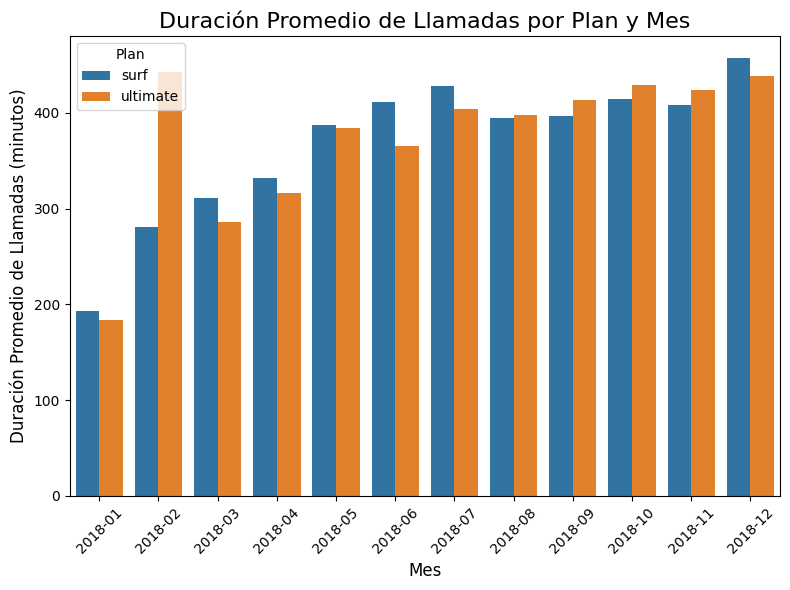

In [31]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

# Agrupar por 'plan' y 'month' y calcular la duración promedio de las llamadas
avg_duration_per_plan_month = final_data.groupby(['plan', 'month'])['total_minutes'].mean().reset_index()

# Configurar el gráfico
plt.figure(figsize=(8, 6))

# Traza el gráfico de barras usando seaborn
sns.barplot(data=avg_duration_per_plan_month, x='month', y='total_minutes', hue='plan')

# Añadir títulos y etiquetas
plt.title('Duración Promedio de Llamadas por Plan y Mes', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Duración Promedio de Llamadas (minutos)', fontsize=12)
plt.xticks(rotation=45)  # Rotar las etiquetas de los meses para mayor claridad
plt.legend(title='Plan', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

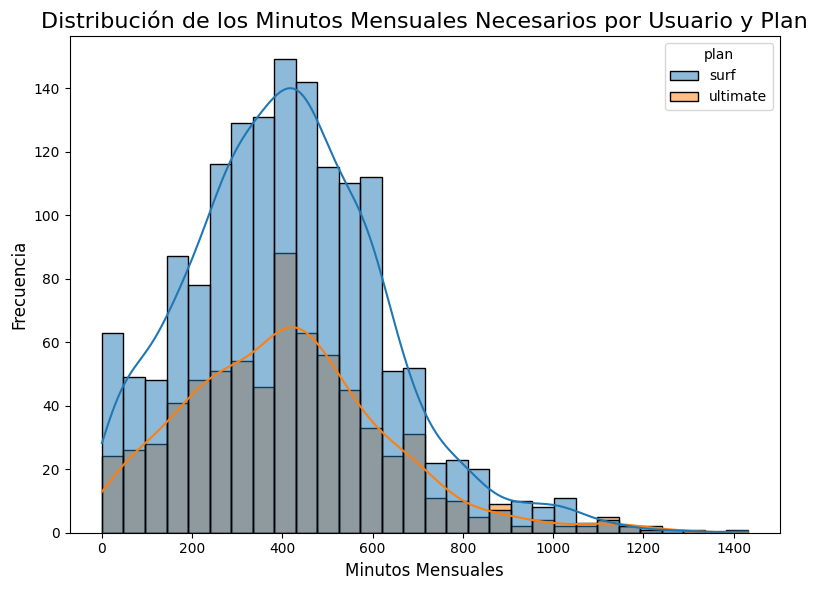

In [39]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

# Agrupar por 'plan', 'month' y 'user_id' para obtener la duración total de minutos por usuario
minutes_per_user_plan = final_data.groupby(['plan', 'month', 'user_id'])['total_minutes'].sum().reset_index()

# Configurar el gráfico
plt.figure(figsize=(8, 6))

# Traza el histograma usando seaborn
sns.histplot(data=minutes_per_user_plan, x='total_minutes', hue='plan', kde=True, bins=30)

# Añadir títulos y etiquetas
plt.title('Distribución de los Minutos Mensuales Necesarios por Usuario y Plan', fontsize=16)
plt.xlabel('Minutos Mensuales', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [40]:
# Calcula la media y la varianza de la duración mensual de llamadas.

# Agrupar por 'plan', 'month' y 'user_id' para obtener la duración total de minutos por usuario
minutes_per_user_plan = final_data.groupby(['plan', 'month', 'user_id'])['total_minutes'].sum().reset_index()

# Calcular la media de la duración mensual de las llamadas
mean_duration = minutes_per_user_plan['total_minutes'].mean()

# Calcular la varianza de la duración mensual de las llamadas
variance_duration = minutes_per_user_plan['total_minutes'].var()

# Mostrar los resultados
print(f"Media de la duración mensual de llamadas: {mean_duration:.2f} minutos")
print(f"Varianza de la duración mensual de llamadas: {variance_duration:.2f} minutos^2")

Media de la duración mensual de llamadas: 411.49 minutos
Varianza de la duración mensual de llamadas: 48088.30 minutos^2


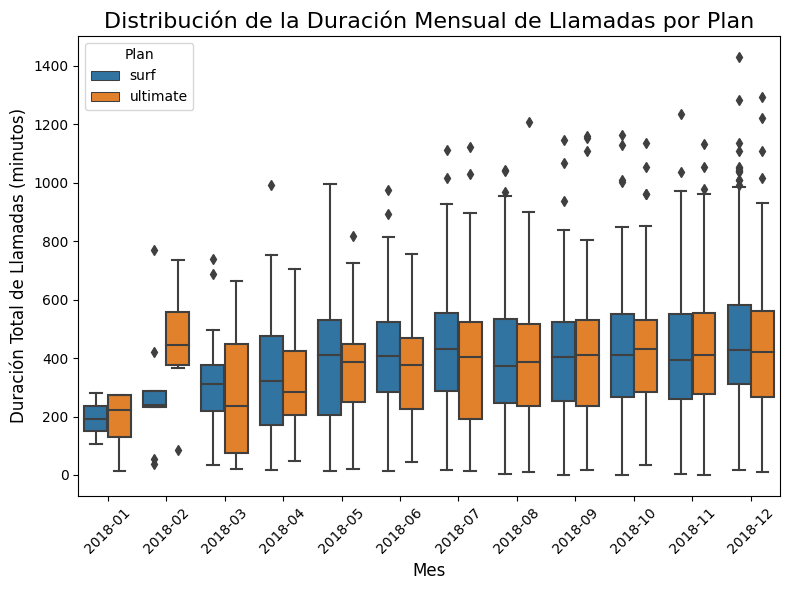

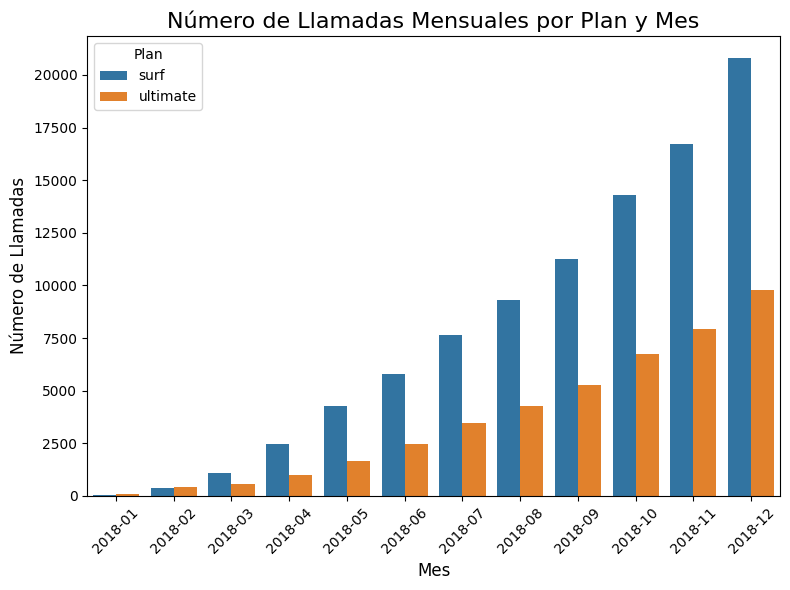

In [43]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar por 'plan', 'month' y 'user_id' para obtener la duración total de minutos por usuario
minutes_per_user_plan = final_data.groupby(['plan', 'month', 'user_id'])['total_minutes'].sum().reset_index()

# Configurar el gráfico
plt.figure(figsize=(8, 6))

# Traza el diagrama de caja (boxplot) usando seaborn
sns.boxplot(data=minutes_per_user_plan, x='month', y='total_minutes', hue='plan')

# Añadir títulos y etiquetas
plt.title('Distribución de la Duración Mensual de Llamadas por Plan', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Duración Total de Llamadas (minutos)', fontsize=12)
plt.xticks(rotation=45)  # Rotar las etiquetas de los meses para mejor visualización
plt.legend(title='Plan', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()



print()
print()
print()
# gráfia extra del conteo de llamadas por usuario por plan. 
# Agrupar por 'plan', 'month', y 'user_id' para contar el número de llamadas por mes y por plan
calls_per_plan_month = final_data.groupby(['plan', 'month'])['calls_count'].sum().reset_index()

# Configurar el gráfico de barras
plt.figure(figsize=(8, 6))

# Traza el gráfico de barras usando seaborn
sns.barplot(data=calls_per_plan_month, x='month', y='calls_count', hue='plan')

# Añadir títulos y etiquetas
plt.title('Número de Llamadas Mensuales por Plan y Mes', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Número de Llamadas', fontsize=12)
plt.xticks(rotation=45)  # Rotar las etiquetas de los meses para mejor visualización
plt.legend(title='Plan', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

En cuanto a la duración promedio de llamadas podemos ver que tienden a una distribución uniforme tomndo como tope alrededor de los 400 minutos al mes, en cuanto a la distribución de los Minutos Mensuales Necesarios por Usuario y Plan pdemos ver una notable diferencia en cunto a comportamiento por cada plan, para lo susuarios de Surf podemos ver que la media de uso mensual ronda los 400 minutos lo cual es casi el tope de su plan por lo que el plan se aprovecha mejor, y lo susuarios de Ultimate parece que ocupan menos los minutos ya que a pesar de que su media también ronda los 400 minutos mensuales (muy alejado de su tope de 3000 minutos) la frecuencia de uso de estos minutos es casi la mitad de la fecuencia de uso de los usuarios del plan Ultimate. En resumen podemos ver que el promedio de duración de llamadas es similar entre los usuarios sin ebargo hay una notable diferencia en la frecuancia de estas llamdas, ya que los del surf relizan practicamente el doble de llamdas al mes. 

### Mensajes

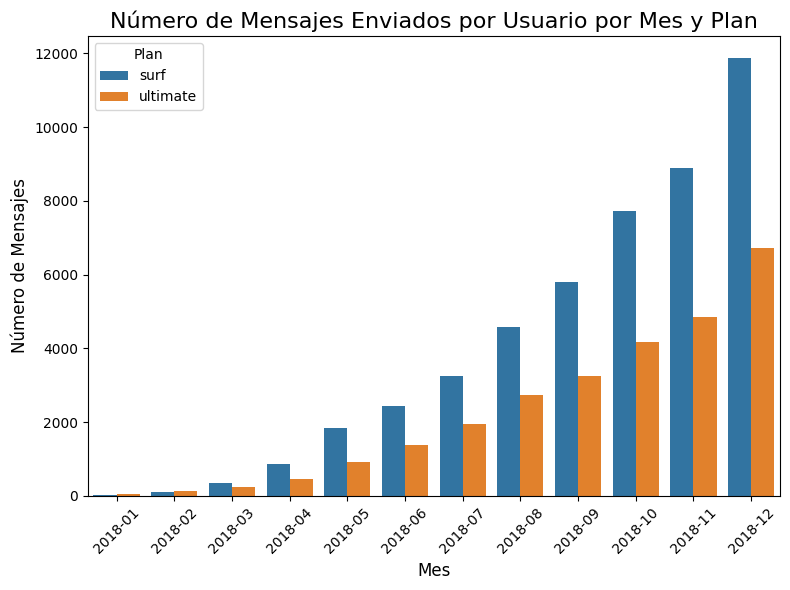

In [45]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

# Agrupar por 'plan', 'month', y 'user_id' para contar el número de mensajes por mes y por plan
messages_per_plan_month = final_data.groupby(['plan', 'month'])['messages_count'].sum().reset_index()

plt.figure(figsize=(8, 6))

# Traza el gráfico de barras usando seaborn
sns.barplot(data=messages_per_plan_month, x='month', y='messages_count', hue='plan')

# Añadir títulos y etiquetas
plt.title('Número de Mensajes Enviados por Usuario por Mes y Plan', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Número de Mensajes', fontsize=12)
plt.xticks(rotation=45)  # Rotar las etiquetas de los meses para mejor visualización
plt.legend(title='Plan', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

plan
surf        39.980737
ultimate    46.455959
Name: messages_count, dtype: float64


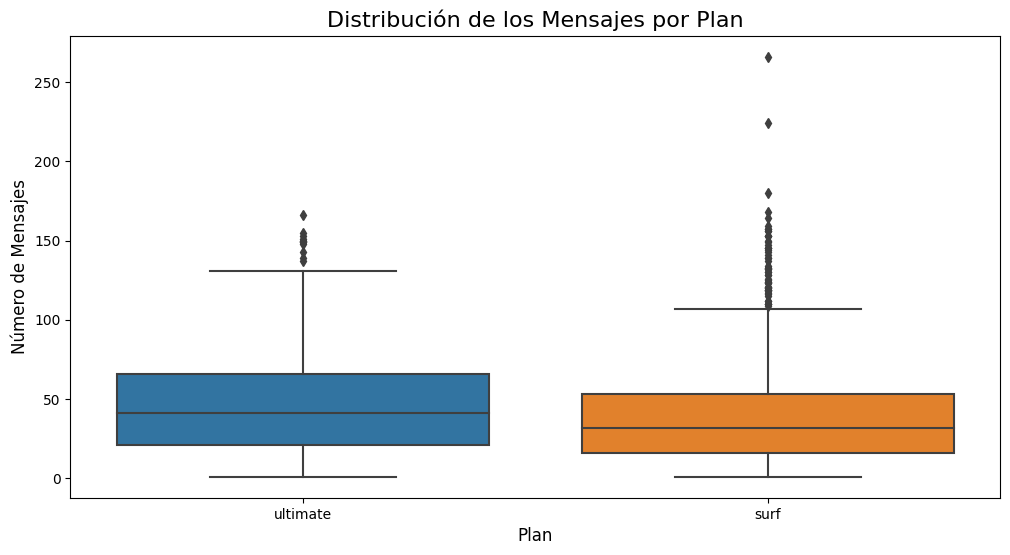

In [47]:
# Promedio de mensajes por usuario por plan:

average_messages_per_user_plan = final_data.groupby('plan')['messages_count'].mean()
print(average_messages_per_user_plan)

plt.figure(figsize=(12, 6))
sns.boxplot(data=final_data, x='plan', y='messages_count')
plt.title('Distribución de los Mensajes por Plan', fontsize=16)
plt.xlabel('Plan', fontsize=12)
plt.ylabel('Número de Mensajes', fontsize=12)
plt.show()

plan
surf        80.674847
ultimate    84.516129
Name: user_id, dtype: float64




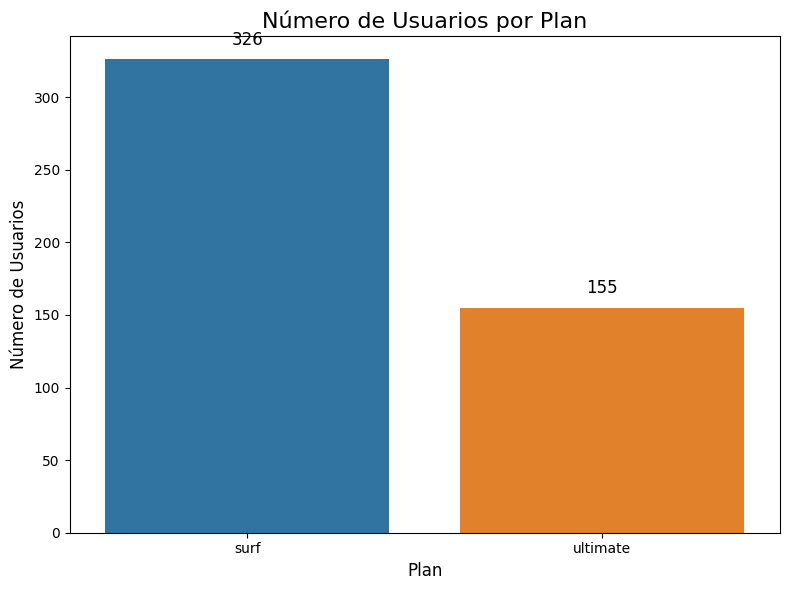

In [49]:
# Proporción de usuarios activos que envían mensajes

active_users = final_data[final_data['messages_count'] > 0].groupby('plan')['user_id'].nunique()
total_users = final_data.groupby('plan')['user_id'].nunique()
proportion_active_users = active_users / total_users * 100
print(proportion_active_users)


print()
print()

# Calcular el número de usuarios únicos por plan
users_per_plan = final_data.groupby('plan')['user_id'].nunique().reset_index()

# Configurar el gráfico de barras
plt.figure(figsize=(8, 6))

# Traza el gráfico de barras usando seaborn
sns.barplot(data=users_per_plan, x='plan', y='user_id')

# Añadir títulos y etiquetas
plt.title('Número de Usuarios por Plan', fontsize=16)
plt.xlabel('Plan', fontsize=12)
plt.ylabel('Número de Usuarios', fontsize=12)

# Añadir etiquetas de los datos sobre cada barra
for index, value in enumerate(users_per_plan['user_id']):
    plt.text(index, value + 10, str(value), ha='center', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

 Definitivamente hay una diferencia de comportamiento en cuanto a mensajes por usuario por plan, las métricas podrian parecer incluso algo extrañas ya que los promedios de mensajes por suario por plan no estan muy alejados entre sí e incluso parecería que los suarios de ultimate envían más mensajes en prmedio al mes y en proporción son más activos (aunque cabe señalar que los uasuarios de surf aprovechan de mejor forma su plan ya que suelen estar más cerca de su tope mensual cada mes en promedio, mientras que los usuarios de ultimate se quedan por debajo de los mensajes que podrian enviar), sin embargo todo cobra sentido al ver que hay practicamente el doble de susuarios para el plan surf en comparación con el plan ultimate. Y creo que esprescismante esta métrica es la que va a ser más determinante en el comportamiento observado no solo en mensajes si no en llamdas e internet también. 

### Internet

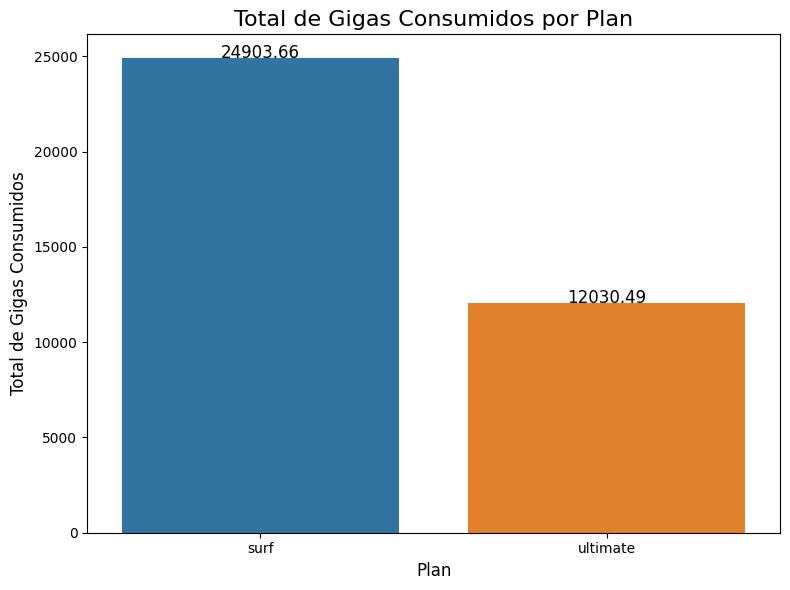

In [50]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

# Convertir los megabytes a gigabytes y agregar una nueva columna 'total_gb_used'
final_data['total_gb_used'] = final_data['total_mb_used'] / 1024

# Agrupar por 'plan' y calcular la cantidad total de gigas consumidos por cada plan
gb_per_plan = final_data.groupby('plan')['total_gb_used'].sum().reset_index()

# Configurar el gráfico de barras
plt.figure(figsize=(8, 6))

# Traza el gráfico de barras usando seaborn
sns.barplot(data=gb_per_plan, x='plan', y='total_gb_used')

# Añadir títulos y etiquetas
plt.title('Total de Gigas Consumidos por Plan', fontsize=16)
plt.xlabel('Plan', fontsize=12)
plt.ylabel('Total de Gigas Consumidos', fontsize=12)

# Añadir etiquetas de los datos sobre cada barra
for index, value in enumerate(gb_per_plan['total_gb_used']):
    plt.text(index, value + 5, f'{value:.2f}', ha='center', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

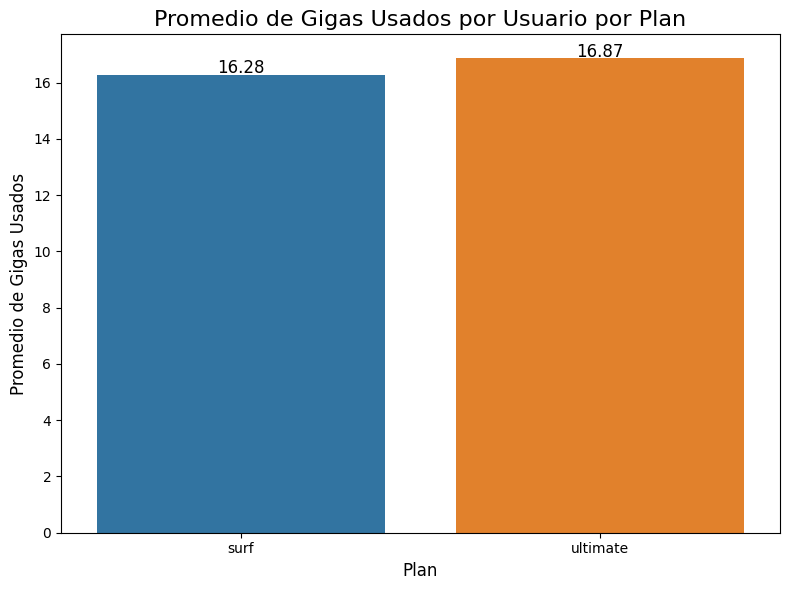

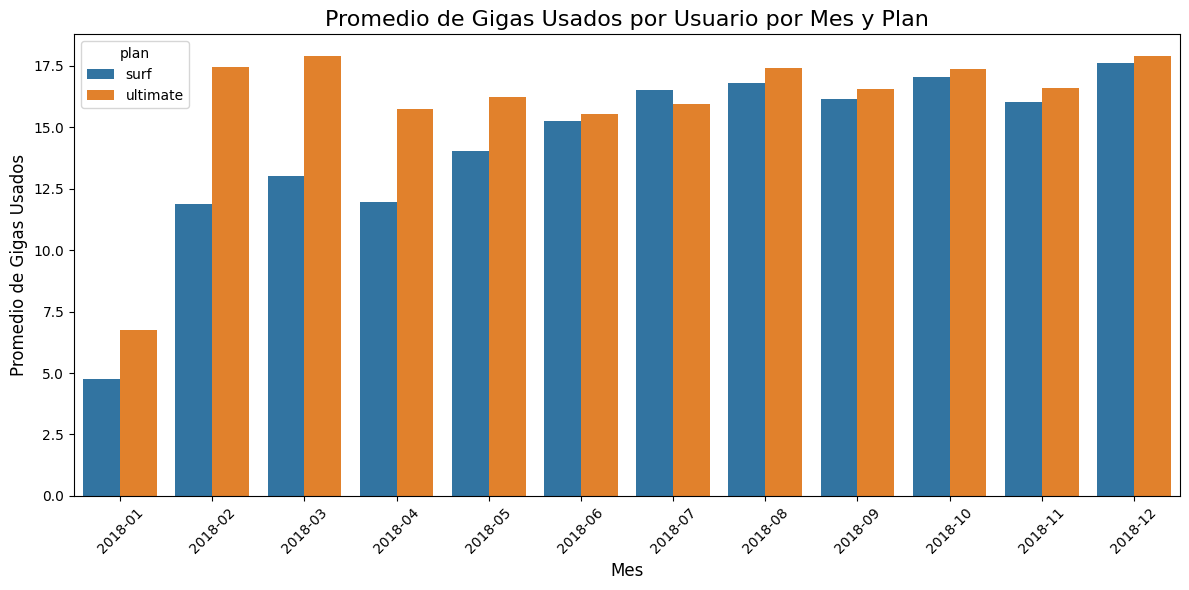

In [52]:
# Agrupar por 'plan' y calcular el promedio de 'total_gb_used' por usuario
average_gb_per_user_plan = final_data.groupby('plan')['total_gb_used'].mean().reset_index()

# Configurar el gráfico de barras
plt.figure(figsize=(8, 6))

# Traza el gráfico de barras usando seaborn
sns.barplot(data=average_gb_per_user_plan, x='plan', y='total_gb_used')

# Añadir títulos y etiquetas
plt.title('Promedio de Gigas Usados por Usuario por Plan', fontsize=16)
plt.xlabel('Plan', fontsize=12)
plt.ylabel('Promedio de Gigas Usados', fontsize=12)

# Añadir etiquetas de los datos sobre cada barra
for index, value in enumerate(average_gb_per_user_plan['total_gb_used']):
    plt.text(index, value + 0.05, f'{value:.2f}', ha='center', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


print()
print()

average_gb_per_user_month_plan = final_data.groupby(['month', 'plan'])['total_gb_used'].mean().reset_index()

# Configurar el gráfico de barras
plt.figure(figsize=(12, 6))

# Traza el gráfico de barras usando seaborn
sns.barplot(data=average_gb_per_user_month_plan, x='month', y='total_gb_used', hue='plan')

# Añadir títulos y etiquetas
plt.title('Promedio de Gigas Usados por Usuario por Mes y Plan', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Promedio de Gigas Usados', fontsize=12)
plt.xticks(rotation=45)  # Rotar las etiquetas de los meses para mayor claridad

# Mostrar el gráfico
plt.tight_layout()
plt.show()

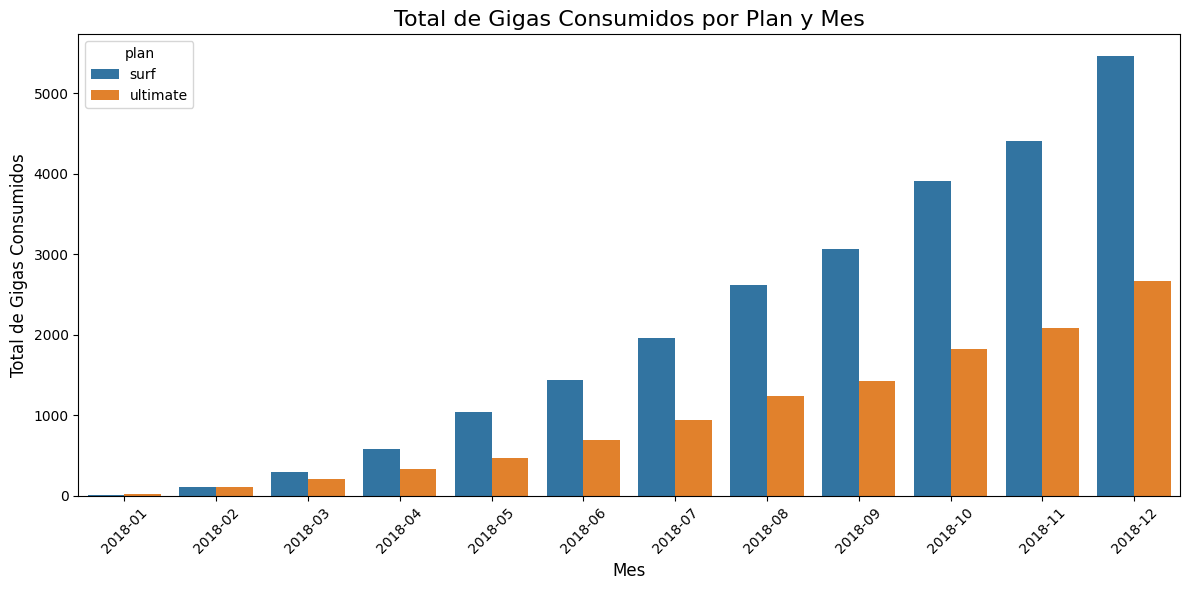

In [53]:
# Comparación de total de gigas consumidos por plan y mes

total_gb_per_plan_month = final_data.groupby(['plan', 'month'])['total_gb_used'].sum().reset_index()

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(data=total_gb_per_plan_month, x='month', y='total_gb_used', hue='plan')
plt.title('Total de Gigas Consumidos por Plan y Mes', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Total de Gigas Consumidos', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En primera instancia podemos ver que el promedio de gb usado por cliente por tipo de plan es realmente similar entre sí, este uso manyiene una tendencia uniforme a lo largo del año, nuevamnet sobr el aprovechamiemto de los planes, para los usuarios de surf en promedio su plan se queda corto por 1.28 gb cada mes, mientras que los usuarios de ultimate apenas rebasan la mitad del tope de gigas de su plan, y nuevamnte los datos se diferencian al momento de ver lo gb totales donde la tendencia de que los del surf usen el doble en ste caso de gb se mantine lo que sugiere que es proporcional a la cantidad de usuarios inscritos en el plan 

## Ingreso

Del mismo modo que hemos estudiado el comportamiento de los usuarios, vamos a describir estadísticamente los ingresos de los planes.

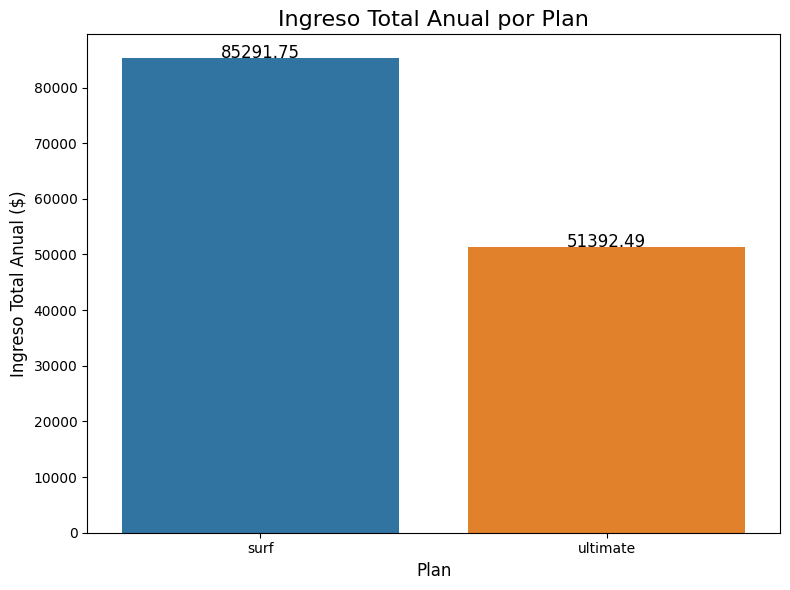

In [57]:
# Calcular el ingreso total anual por plan
total_income_per_plan = final_data.groupby('plan')['monthly_income'].sum().reset_index()

# Configurar el gráfico de barras
plt.figure(figsize=(8, 6))

# Traza el gráfico de barras usando seaborn
sns.barplot(data=total_income_per_plan, x='plan', y='monthly_income')

# Añadir títulos y etiquetas
plt.title('Ingreso Total Anual por Plan', fontsize=16)
plt.xlabel('Plan', fontsize=12)
plt.ylabel('Ingreso Total Anual ($)', fontsize=12)

# Añadir etiquetas de los datos sobre cada barra
for index, value in enumerate(total_income_per_plan['monthly_income']):
    plt.text(index, value + 10, f'{value:.2f}', ha='center', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

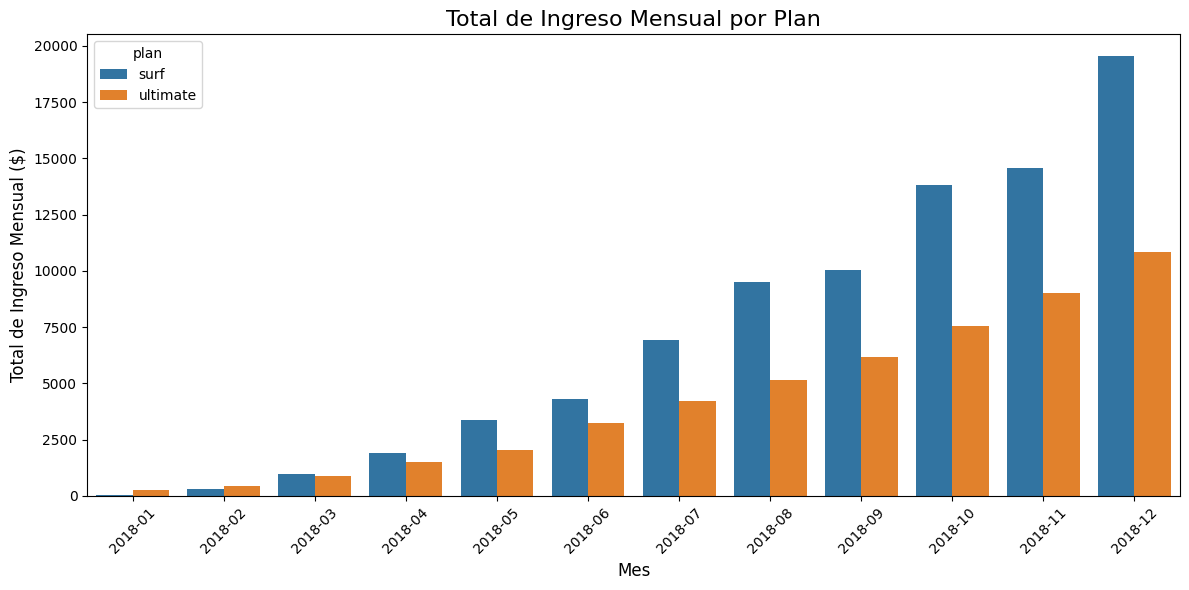

In [58]:
# Calcular el total de ingresos por mes y plan
total_income_per_month_plan = final_data.groupby(['month', 'plan'])['monthly_income'].sum().reset_index()

# Configurar el gráfico de barras
plt.figure(figsize=(12, 6))

# Traza el gráfico de barras usando seaborn
sns.barplot(data=total_income_per_month_plan, x='month', y='monthly_income', hue='plan')

# Añadir títulos y etiquetas
plt.title('Total de Ingreso Mensual por Plan', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Total de Ingreso Mensual ($)', fontsize=12)
plt.xticks(rotation=45)  # Rotar las etiquetas de los meses para mayor claridad

# Mostrar el gráfico
plt.tight_layout()
plt.show()

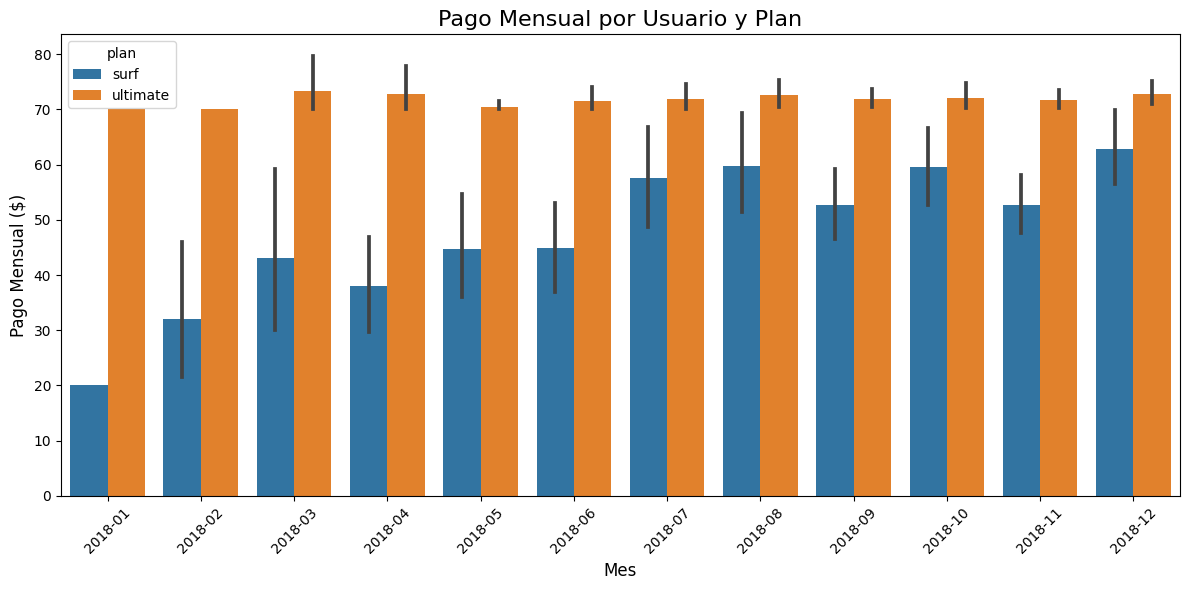

In [59]:
# cuanto pagan mensualmento los usuarios de cada plan 

# Agrupar por 'plan', 'month' y 'user_id', y obtener el valor de 'monthly_income' por usuario
payment_per_user_plan_month = final_data.groupby(['plan', 'month', 'user_id'])['monthly_income'].sum().reset_index()

# Configurar el gráfico de barras
plt.figure(figsize=(12, 6))

# Traza el gráfico de barras usando seaborn
sns.barplot(data=payment_per_user_plan_month, x='month', y='monthly_income', hue='plan')

# Añadir títulos y etiquetas
plt.title('Pago Mensual por Usuario y Plan', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Pago Mensual ($)', fontsize=12)
plt.xticks(rotation=45)  # Rotar las etiquetas de los meses para mejor visualización

# Mostrar el gráfico
plt.tight_layout()
plt.show()

En primera instancia llama mi atención que el plan surf genera algo cercano al doble de lo que genera el plan ultimate aunque es un buen ingreso considerano qu el plan surf tiene practicamnte el doble de suscriptores. Tambén algo interesante a destacar es que el ingreso es incremental con coforme avanza el año, y esta tendencia tambien se ve reflejada en el uso incremental de lo que ofrecen los planes (gigas, mensajes y llamadas), me gustaria saber si este comportamiento es ciclico y cada año vemos una tendencia similar o por el contrario es una tendencia meramente asecendente conforme pasan los años. Tambien cabe resaltar en cuanto a aprovechamiento que los usuarios de ultimate no suelen pagar más nada más allá de su tarifa mensual, mientras que para los usaurios de surf la mayoría termina pagando el doble o más de lo que inicialmente estaba dispuesto a pagar, entonces podemos ver que para los usuarios del plan surf por lo general les queda corto en todos los servicios y a los ultimate les sobra capacidad en todos los servicios. 

## Prueba las hipótesis estadísticas

Hipótesis nula (H₀): No hay diferencia en los ingresos promedio entre los usuarios de los planes Ultimate y Surf. Es decir, las medias de ambos planes son iguales.

Hipótesis alternativa (H₁): Hay una diferencia en los ingresos promedio entre los usuarios de los planes Ultimate y Surf. Es decir, las medias de los dos planes son diferentes.

In [ ]:
# Prueba las hipótesis

# Filtrar los ingresos de los usuarios de cada plan
ultimate_income = final_data[final_data['plan'] == 'ultimate']['monthly_income']
surf_income = final_data[final_data['plan'] == 'surf']['monthly_income']

# Calcular los promedios de ingresos para cada plan
mean_ultimate_income = ultimate_income.mean()
mean_surf_income = surf_income.mean()

# Imprimir los promedios de ingresos de cada plan
print(f"Promedio de Ingreso para el Plan Ultimate: ${mean_ultimate_income:.2f}")
print(f"Promedio de Ingreso para el Plan Surf: ${mean_surf_income:.2f}")

# Realizar la prueba t para muestras independientes
t_stat, p_value = stats.ttest_ind(ultimate_income, surf_income)

# Definir el valor alfa
alpha = 0.05

# Imprimir los resultados de la prueba
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Determinar si rechazamos o no la hipótesis nula
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Hay una diferencia significativa en los ingresos promedio entre los planes.")
else:
    print("No rechazamos la hipótesis nula: No hay diferencia significativa en los ingresos promedio entre los planes.")

Promedio de Ingreso para el Plan Ultimate: $72.08
Promedio de Ingreso para el Plan Surf: $55.21
T-Statistic: 8.73625363314156
P-Value: 4.605913705623888e-18
Rechazamos la hipótesis nula: Hay una diferencia significativa en los ingresos promedio entre los planes.


Probamos la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.

Hipótesis nula (H₀): El ingreso promedio de los usuarios de NY-NJ es igual al ingreso promedio de los usuarios de otras regiones.

Hipótesis alternativa (H₁): El ingreso promedio de los usuarios de NY-NJ es diferente al ingreso promedio de los usuarios de otras regiones.

In [ ]:
# Prueba las hipótesis

# Extraer la región de la columna 'city' (en este caso, 'NY-NJ' para los usuarios de la zona)
final_data_with_city['region'] = final_data_with_city['city'].apply(
    lambda x: 'NY-NJ' if 'New York-Newark-Jersey City, NY-NJ' in x else 'Other'
)

# Filtrar los ingresos de los usuarios de NY-NJ y otras regiones
ny_nj_income = final_data_with_city[final_data_with_city['region'] == 'NY-NJ']['monthly_income']
other_region_income = final_data_with_city[final_data_with_city['region'] == 'Other']['monthly_income']

# Calcular los promedios de ingresos para cada grupo
mean_ny_nj_income = ny_nj_income.mean()
mean_other_region_income = other_region_income.mean()

# Imprimir los promedios de ingresos de cada grupo
print(f"Promedio de Ingreso para los usuarios de NY-NJ: ${mean_ny_nj_income:.2f}")
print(f"Promedio de Ingreso para los usuarios de otras regiones: ${mean_other_region_income:.2f}")

# Realizar la prueba t para muestras independientes
t_stat, p_value = stats.ttest_ind(ny_nj_income, other_region_income)

# Definir el valor alfa
alpha = 0.05

# Imprimir los resultados de la prueba
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Determinar si rechazamos o no la hipótesis nula
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Hay una diferencia significativa en los ingresos promedio entre NY-NJ y otras regiones.")
else:
    print("No rechazamos la hipótesis nula: No hay diferencia significativa en los ingresos promedio entre NY-NJ y otras regiones.")


Promedio de Ingreso para los usuarios de NY-NJ: $55.09
Promedio de Ingreso para los usuarios de otras regiones: $61.60
T-Statistic: -2.6490816269551276
P-Value: 0.008127379299910744
Rechazamos la hipótesis nula: Hay una diferencia significativa en los ingresos promedio entre NY-NJ y otras regiones.


## Conclusión general

En este análisis, se observa que los usuarios del plan Surf tienden a aprovechar mejor las capacidades de su tarifa, especialmente en términos de llamadas, donde el promedio de minutos utilizados se acerca al límite mensual de su plan. Por otro lado, los usuarios de Ultimate utilizan una fracción mucho menor de su tope de minutos. y a pesar de tener más capacidad, realizan menos llamadas que los usuarios de Surf. En cuanto a los mensajes, los usuarios de ambos planes parecen enviar cantidades similares, pero los usuarios de Surf son más activos, lo cual puede explicarse por el mayor número de suscriptores en este plan, lo que hace que el número de mensajes sea más alto en términos absolutos. En términos de internet, la diferencia en el uso de gigas no es tan notable por usuario, pero el uso total de datos muestra que los usuarios de Surf tienden a superar a los de Ultimate, en parte por la mayor base de clientes. Finalmente, en cuanto al ingreso, a pesar de que el plan Surf genera más ingresos debido a la mayor cantidad de usuarios, es evidente que los usuarios de este plan suelen pagar más allá de su tarifa mensual, lo que refleja que este plan no cubre completamente las necesidades de los usuarios, mientras que los usuarios de Ultimate apenas superan su cuota mensual. Estos resultados sugieren que el plan Surf está más ajustado a las necesidades de los usuarios, mientras que el plan Ultimate tiene un margen de capacidad sin aprovechar, lo cual debe ser considerado por el departamento comercial al evaluar las tarifas para ajustes en el presupuesto de publicidad.

A modo de recomendación persoanl y basado en los datos analizados, recomiendo la creación de un plan intermedio entre los actuales Surf y Ultimate. Actualmente, los usuarios de Surf, aunque disfrutan de un costo mensual bajo, a menudo se ven limitados por los topes de minutos, mensajes y datos, lo que los lleva a pagar más de lo esperado para cubrir sus necesidades. Por otro lado, los usuarios de Ultimate tienen una tarifa más alta y una gran capacidad de uso sin aprovechar, lo que sugiere que hay una brecha entre lo que los usuarios realmente necesitan y lo que el plan les ofrece. Un plan intermedio podría ofrecer más minutos, mensajes y datos que el plan Surf, pero a un costo menor que el plan Ultimate, ayudando a reducir el desajuste entre las necesidades de los usuarios y los servicios que realmente consumen. Este plan podría atraer a aquellos usuarios que actualmente se sienten limitados por Surf, pero no necesitan la capacidad completa de Ultimate. Además, esto podría aumentar los ingresos al atraer a un segmento de clientes más amplio, satisfechos con un costo más razonable y un paquete más adecuado a sus hábitos de consumo. Tomando como precio de introducción de $50 mensuales que es cercano al promedio de lo que ya pagan los uasuarios de surf mes a mes. 